In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('data.xlsx')
df

,data,USD,CAD,EUR
0,2023-10-26,93.1507,67.8397,98.6543
1,2023-10-25,93.5224,68.2994,99.5534
2,2023-10-24,94.7081,69.1552,100.3030
3,2023-10-21,95.9053,69.9273,101.4257
4,2023-10-20,97.3074,71.1052,102.6255
...,...,...,...,...
1227,2018-11-01,65.5962,49.9666,74.4189
1228,2018-10-31,65.7742,50.1978,74.7918
1229,2018-10-30,65.8129,50.2427,75.0399
1230,2018-10-27,65.6345,49.9426,74.6658


## Графический анализ

D:\CONDA\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
D:\CONDA\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
D:\CONDA\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


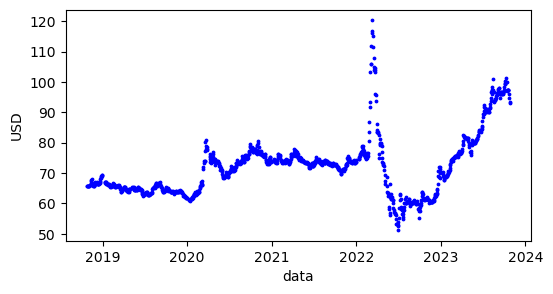

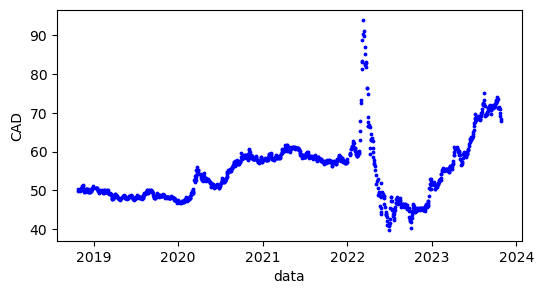

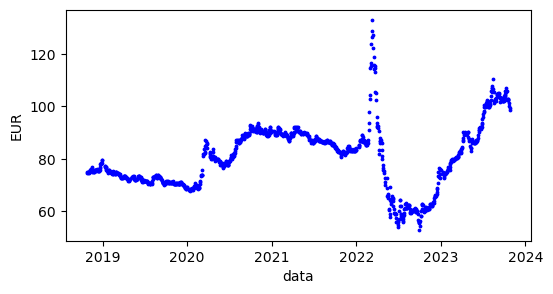

In [3]:
for col in df.iloc[:,1:].columns:
    df.plot.scatter(x='data', y =col, c = 'b', figsize=( 6 , 3 ), s = 3)

## Функция плотности вероятности

<Axes: ylabel='Density'>

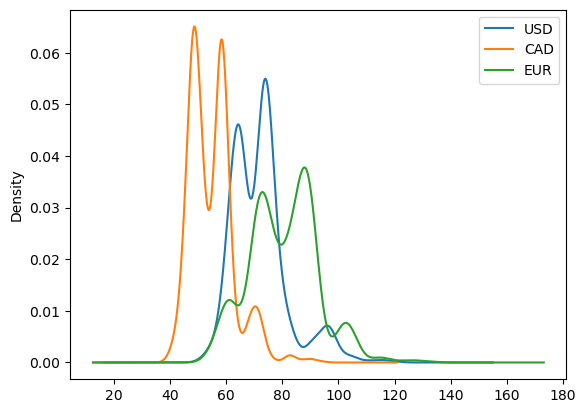

In [4]:
df.iloc[:,1:].plot.kde()

## Мат ожидание, медиана, мода

In [5]:
for col in df.iloc[:,1:].columns:
    print(f"{col}:\nmean = {df[col].mean()} \nmedian = {df[col].median()} \nmode = {df[col].mode()[0]}\n\n")

USD:
mean = 72.06169707792208 
median = 72.3552 
mode = 61.9057


CAD:
mean = 54.94746834415584 
median = 54.68305 
mode = 50.4224


EUR:
mean = 80.61767297077922 
median = 81.05855 
mode = 74.8048




In [6]:
len(df[df['USD']==61.9057])

2

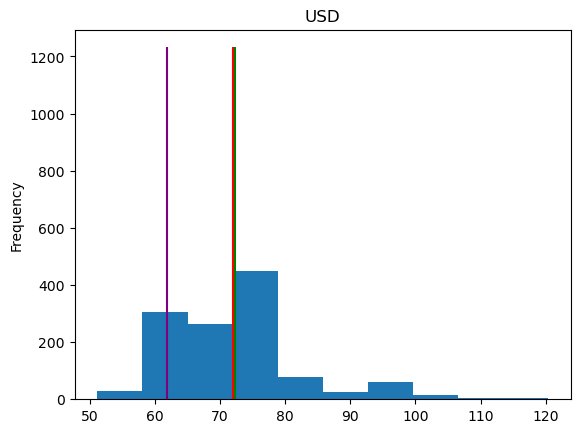

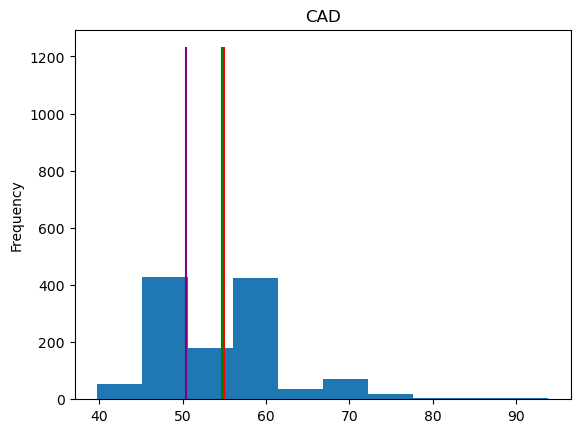

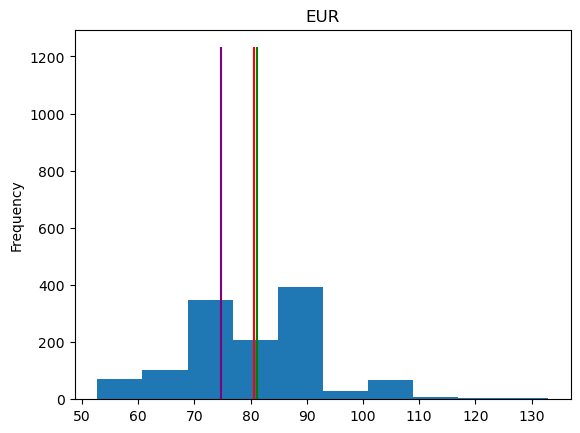

In [7]:
for col in df.iloc[:,1:].columns:
    fig, ax = plt.subplots()
    ax.set_title(col)
    ax.vlines(df[col].mean(), 0, df[col].size, colors = "Red")
    ax.vlines(df[col].median(), 0, df[col].size, colors = "Green")
    ax.vlines(df[col].mode()[0], 0, df[col].size, colors = "Purple")
    df[col].plot.hist()
    plt.show()

## Сравнение функции плотности вероятности с нормальным

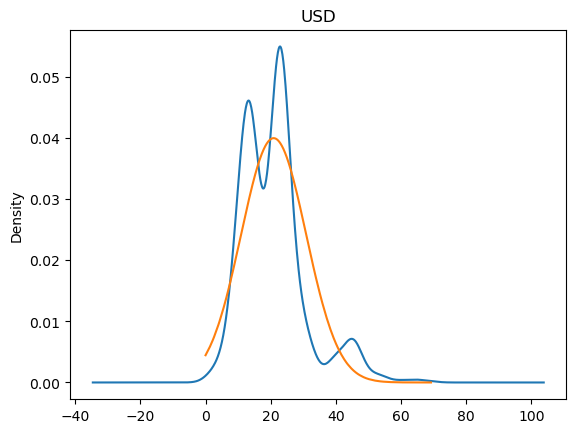

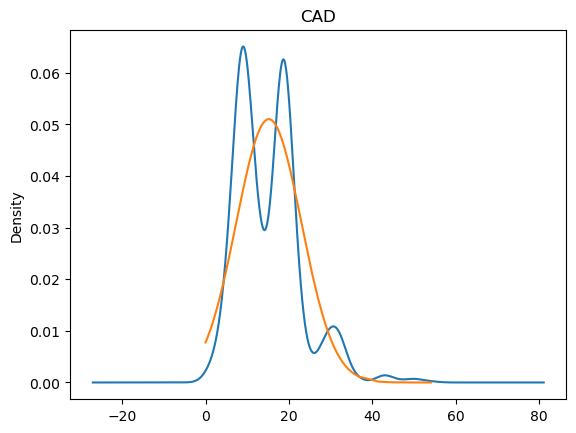

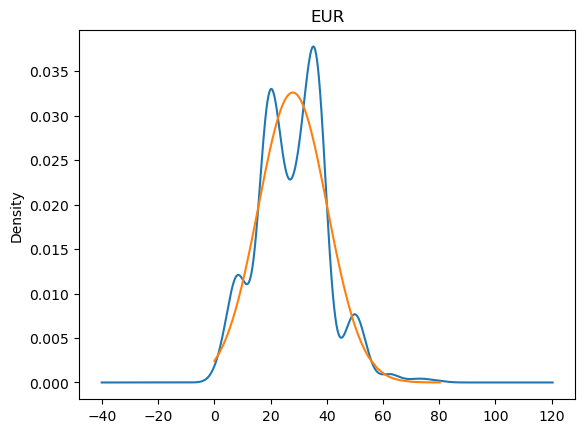

In [8]:
for col in df.iloc[:,1:]:    
    (df[col] - df[col].min()).plot.kde()
    x = np.sort(df[col] - df[col].min())
    plt.plot(x, stats.norm.pdf(x, x.mean(), x.std()))
    plt.title(col)
    plt.show()

## Сравение интегральной функции распределения с нормальным

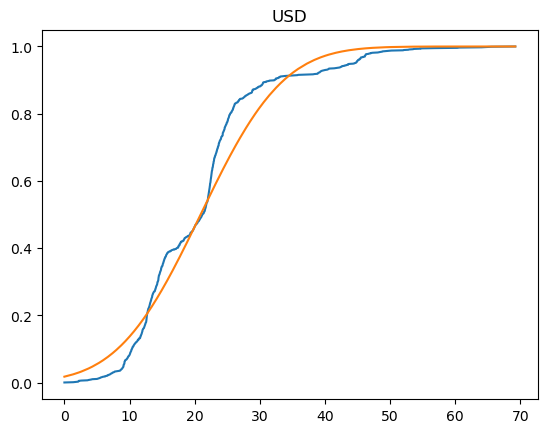

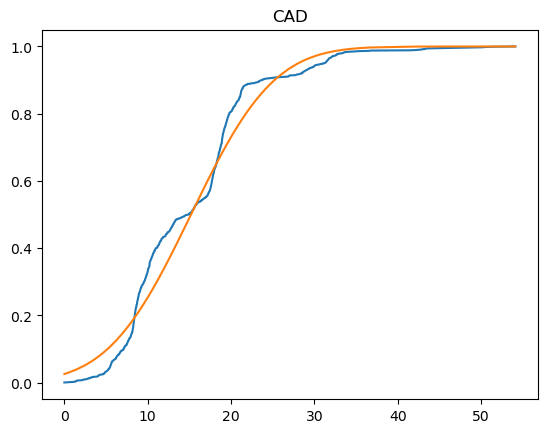

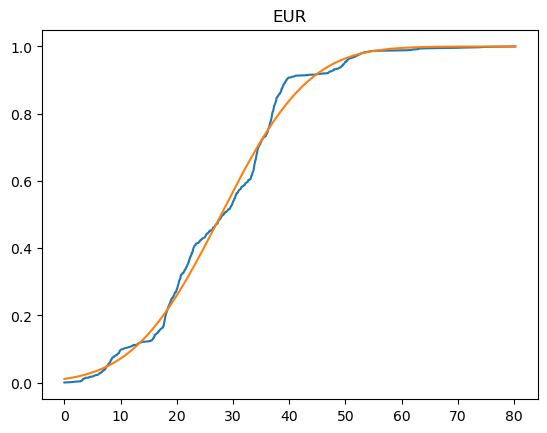

In [9]:
for col in df.iloc[:,1:]:
    x = np.sort(df[col] - df[col].min())
    y = np.arange(1, len(x) + 1) / len(x)
    plt.plot(x, y)
    plt.plot(x, stats.norm.cdf(x, x.mean(), x.std()))
    plt.title(col)
    plt.show()

## Стандартизация

In [10]:
df_s = pd.DataFrame()
df_s[['USD','CAD','EUR']] = df.iloc[:,1:]

In [11]:
df_s

,USD,CAD,EUR
0,93.1507,67.8397,98.6543
1,93.5224,68.2994,99.5534
2,94.7081,69.1552,100.3030
3,95.9053,69.9273,101.4257
4,97.3074,71.1052,102.6255
...,...,...,...
1227,65.5962,49.9666,74.4189
1228,65.7742,50.1978,74.7918
1229,65.8129,50.2427,75.0399
1230,65.6345,49.9426,74.6658


In [12]:
for col in df_s.columns:
    scaler_std = preprocessing.StandardScaler()
    x = scaler_std.fit_transform(df[[col]])
    df_s[col] = x[0:]

df_s

,USD,CAD,EUR
0,2.113185,1.648679,1.474099
1,2.150430,1.707466,1.547581
2,2.269241,1.816907,1.608844
3,2.389204,1.915644,1.700600
4,2.529699,2.066276,1.798658
...,...,...,...
1227,-0.647863,-0.636961,-0.506614
1228,-0.630027,-0.607395,-0.476137
1229,-0.626149,-0.601653,-0.455861
1230,-0.644025,-0.640030,-0.486435


## P-P и Q-Q графики

PP & QQ


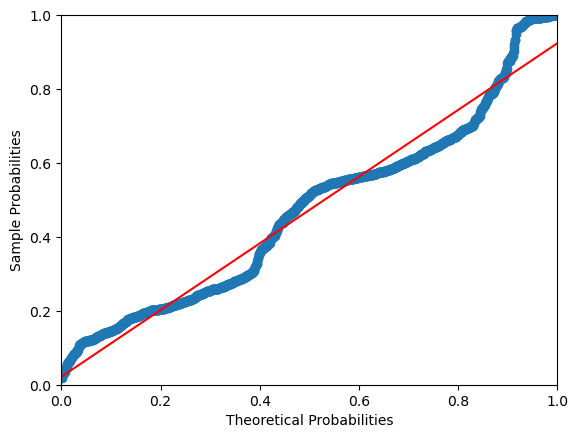

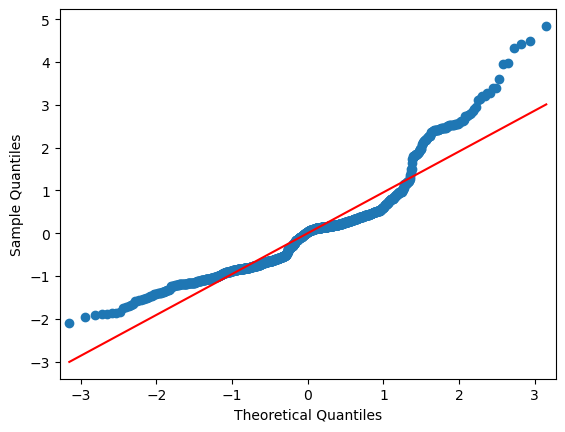

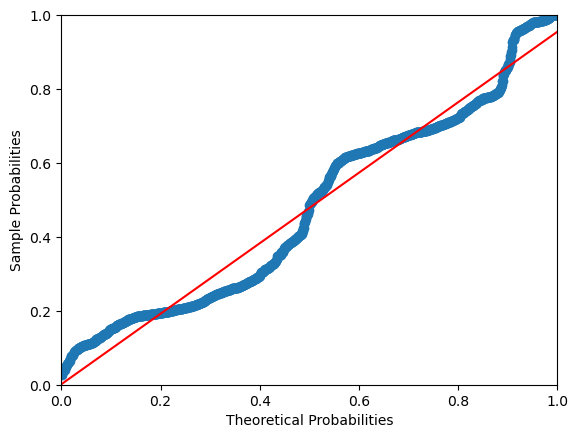

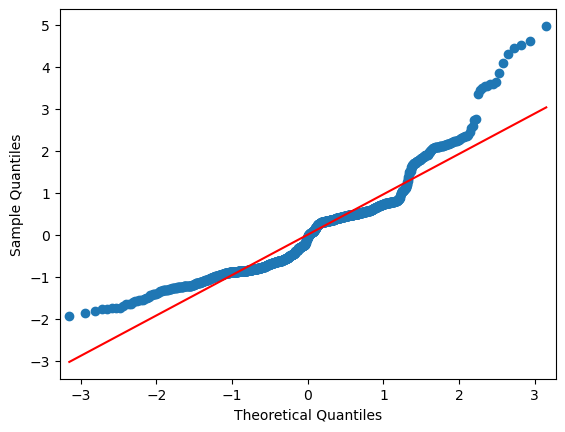

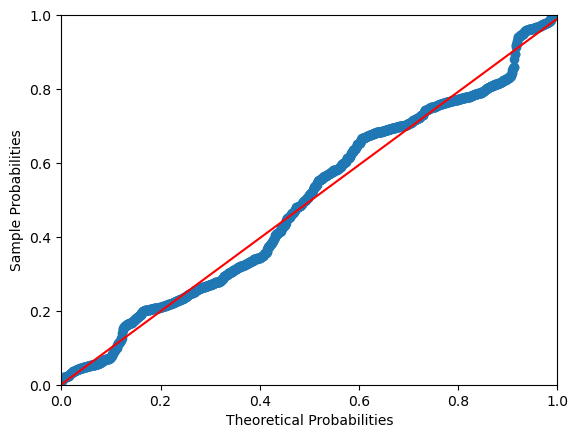

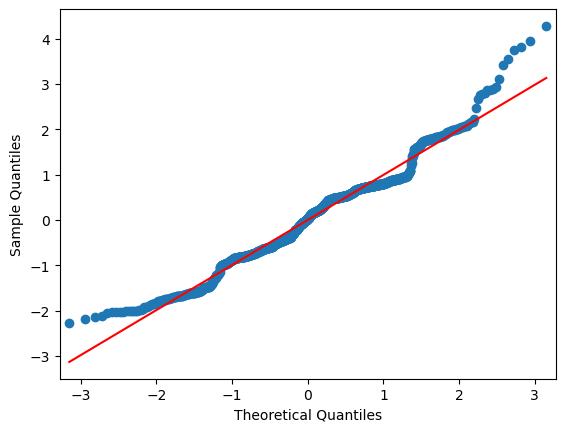

In [13]:
for col in df_s:
    pb = sm.ProbPlot(df_s[col])
    pb.ppplot(line = 'r')
    pb.qqplot(line = 'r')
print('PP & QQ')

## Критерий Шапиро-Уилка

In [14]:
for col in df.iloc[:,1:]:
    w = stats.shapiro(list(df[col]))
    print(col, ':', w)

USD : ShapiroResult(statistic=0.9024698138237, pvalue=2.6128939407036022e-27)
CAD : ShapiroResult(statistic=0.9178050756454468, pvalue=2.4626376242301733e-25)
EUR : ShapiroResult(statistic=0.9764458537101746, pvalue=2.7300172756108965e-13)


## Устранение выбросов по правилу 3-х сигм

In [15]:
value1 = df['USD'].mean() - df['USD'].std()*3
value2 = df['USD'].mean() + df['USD'].std()*3
df.query("USD > @value1 and USD < @value2", inplace=True)

value1 = df['CAD'].mean() - df['CAD'].std()*3
value2 = df['CAD'].mean() + df['CAD'].std()*3
df.query("CAD > @value1 and CAD < @value2", inplace=True)

value1 = df['EUR'].mean() - df['EUR'].std()*3
value2 = df['EUR'].mean() + df['EUR'].std()*3
df.query("EUR > @value1 and EUR < @value2", inplace=True)

## Графическое исследование пар на взаимную корреляцию

D:\CONDA\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


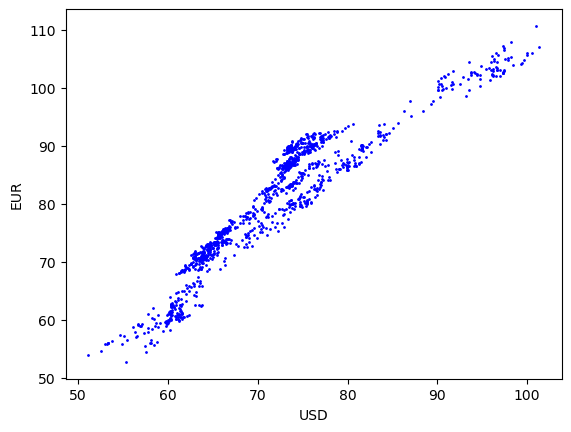

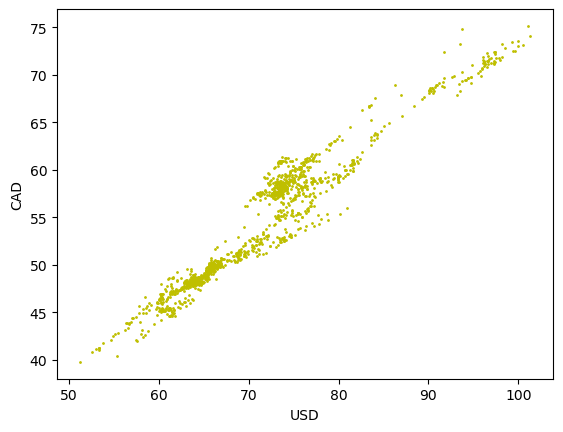

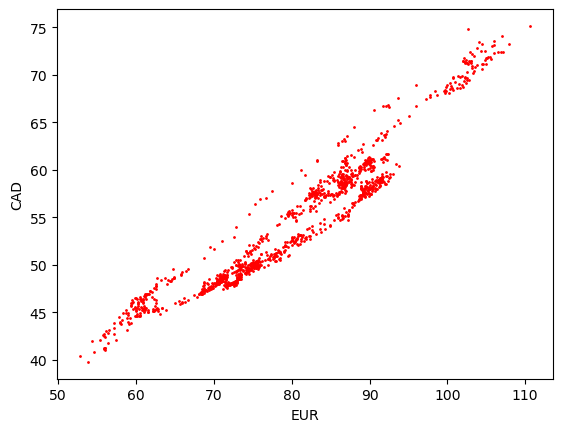

In [16]:
cls_clr = (['USD', 'EUR', 'b'], ['USD', 'CAD', 'y'], ['EUR', 'CAD', 'r'])
for x,y,c in cls_clr:
    df.plot.scatter(x = x, y = y, c = c, s = 1)
plt.show()

## Корреляционные матрицы

In [17]:
cls = (['USD', 'EUR'], ['USD', 'CAD'], ['EUR', 'CAD'])
for x,y in cls:
    cvm = df[[x, y]].cov()
    print(cvm, end = '\n')

           USD         EUR
USD  82.635438   97.550760
EUR  97.550760  130.916696
           USD        CAD
USD  82.635438  61.453236
CAD  61.453236  49.229497
            EUR        CAD
EUR  130.916696  76.954672
CAD   76.954672  49.229497


In [18]:
df.iloc[:,1:].cov()

,USD,CAD,EUR
USD,82.635438,61.453236,97.550760
CAD,61.453236,49.229497,76.954672
EUR,97.550760,76.954672,130.916696


## Критерии Пирсона, Спирмена, Кендалла

In [19]:
for x,y in cls:
    print(x, y)
    pr = stats.pearsonr(df[x], df[y])
    print(pr)
    pr = stats.spearmanr(df[x], df[y])
    print(pr)
    pr = stats.kendalltau(df[x], df[y])
    print(pr)
    print('\n\n')

USD EUR
PearsonRResult(statistic=0.9378858277105742, pvalue=0.0)
SignificanceResult(statistic=0.9425955487934841, pvalue=0.0)
SignificanceResult(statistic=0.8164922033965857, pvalue=0.0)



USD CAD
PearsonRResult(statistic=0.9634937288188397, pvalue=0.0)
SignificanceResult(statistic=0.9439595125842508, pvalue=0.0)
SignificanceResult(statistic=0.8172976271254059, pvalue=0.0)



EUR CAD
PearsonRResult(statistic=0.9585720790223513, pvalue=0.0)
SignificanceResult(statistic=0.9558742094335992, pvalue=0.0)
SignificanceResult(statistic=0.831382380817434, pvalue=0.0)





## Линейная регрессия для пар

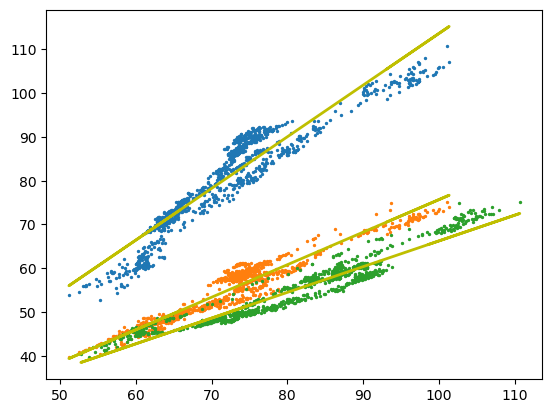

In [20]:
cls = (['USD', 'EUR'], ['USD', 'CAD'], ['EUR', 'CAD'])
for a,b in cls:
    model = LinearRegression()
    X = np.array(df[a]).reshape(-1,1)
    Y = np.array(df[b]).reshape(-1,1)
    model = model.fit(X, Y)
    plt.plot(X, model.predict(X), c = 'y', linewidth = 2)
    plt.scatter(X, Y, s = 2)